### 1. Business overview
- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
 - ID: Unique identifier for the record.
 - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
 - Date: Date when the incident occurred.
 - Block: address where the incident occurred
 - IUCR: The Illinois Uniform Crime Reporting code.
 - Primary Type: The primary description of the IUCR code.
 - Description: The secondary description of the IUCR code, a subcategory of the primary description.


### 2. Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt

### 3. EDA

#### 3.1 Read data

In [2]:
df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)
df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
df = pd.concat([df1, df2, df3, df4])

In [4]:
df1.shape, df2.shape, df3.shape, df4.shape

((1923515, 23), (1872343, 23), (2688710, 23), (1456714, 23))

In [5]:
df.shape

(7941282, 23)

In [6]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


#### 3.2 Data quality check

In [7]:
df.isnull().any()

Unnamed: 0              False
ID                      False
Case Number              True
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

#### 3.3 Engineer data

In [8]:
df.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'X Coordinate', 
              'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 
              'Location', 'District', 'Latitude', 'Longitude'],
        axis = 1,
        inplace=True)

In [9]:
df.shape

(7941282, 7)

In [10]:
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [11]:
df.index = pd.DatetimeIndex(df.Date)
df.drop('Date', inplace = True, axis = 1)

In [12]:
df.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


#### 3.4 Yearly data visualization

In [13]:
df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Num of crimes')

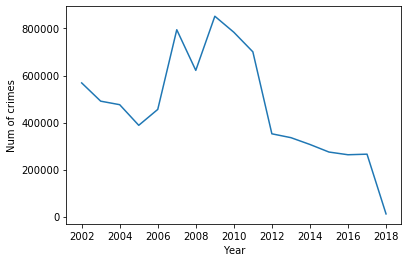

In [14]:
plt.plot(df.resample('Y').size())
plt.xlabel('Year')
plt.ylabel('Num of crimes')

#### 3.5 Quarterly data visualization

Text(0, 0.5, 'Num of crimes')

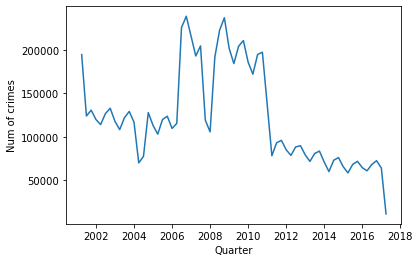

In [15]:
plt.plot(df.resample('Q').size())
plt.xlabel('Quarter')
plt.ylabel('Num of crimes')

#### 3.6 Monthly data visualization

Text(0, 0.5, 'Num of crimes')

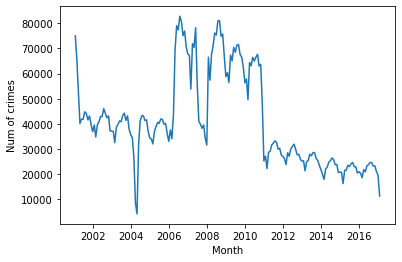

In [16]:
plt.plot(df.resample('M').size())
plt.xlabel('Month')
plt.ylabel('Num of crimes')

#### 3.7 Crime type visualization

In [17]:
df['Primary Type'].value_counts().iloc[: 15]

THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: Primary Type, dtype: int64

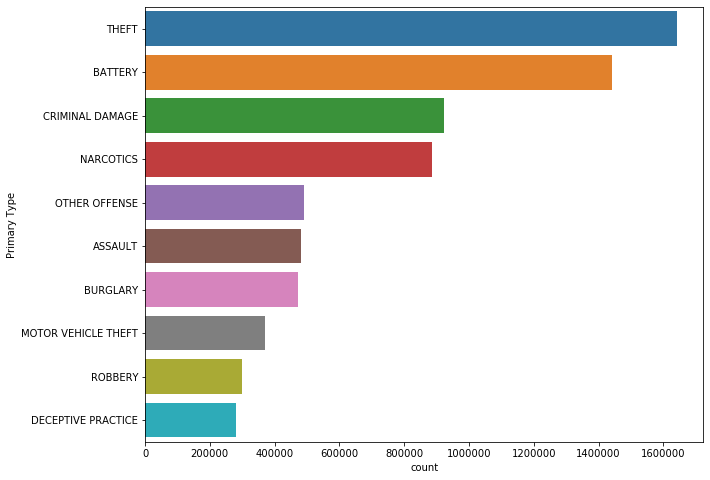

In [18]:
data_order = df['Primary Type'].value_counts().iloc[: 10].index
plt.figure(figsize = (10, 8))
sns.countplot(y = 'Primary Type', data = df, order = data_order)

#### 3.8 Crime location visualization

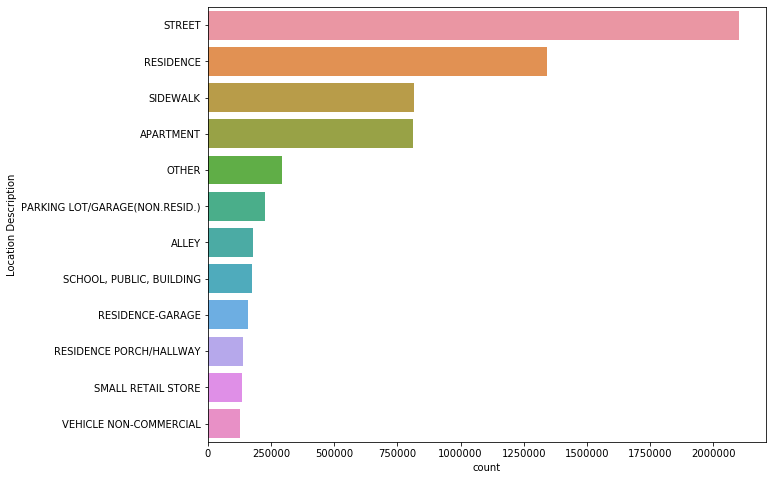

In [19]:
plt.figure(figsize = (10, 8))
sns.countplot(y = 'Location Description', data = df, 
              order = df['Location Description'].value_counts().iloc[: 12].index)

### 4. Data processing

In [20]:
df_m = df.resample('M').size().reset_index()
df_m.columns = ['Date', 'Monthly Crime Count']
df_m_final = df_m.rename(columns = {'Date': 'ds', 'Monthly Crime Count': 'y'})

In [21]:
df_m_final.head()

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876


### 5. Model fit and prediction

#### 5.1 Model fit

In [23]:
m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=10)
m.add_seasonality(name='quarterly', period=91.5, fourier_order=10)
m.fit(df_m_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


#### 5.2 Model prediction and visualization

In [24]:
future = m.make_future_dataframe(periods = 24, freq = 'M')
pred = m.predict(future)

In [25]:
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
212,2018-09-30,2470.774197,-17999.061570,23234.599912
213,2018-10-31,5211.778531,-16466.989226,25239.028740
214,2018-11-30,-4293.551169,-25027.227935,15951.647518
215,2018-12-31,7489.961818,-13286.878063,28587.206024
216,2019-01-31,11684.810464,-7467.711488,30300.908194


##### model result visualization

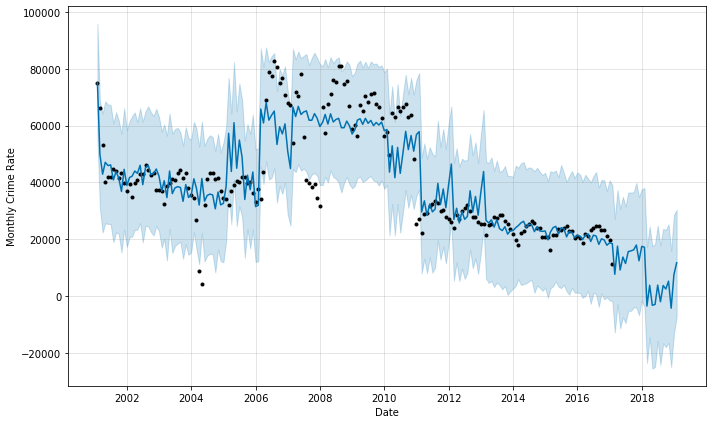

In [26]:
fig = m.plot(pred, xlabel = 'Date', ylabel = 'Monthly Crime Rate')

##### model component visualization

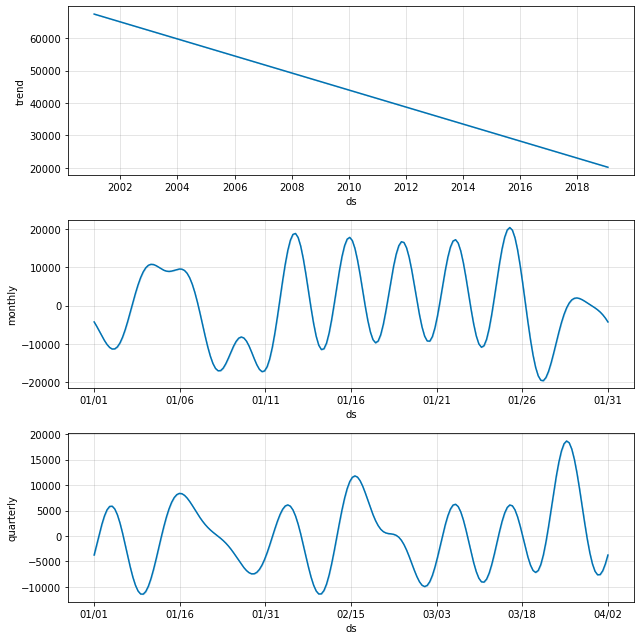

In [27]:
fig = m.plot_components(pred)